<a href="https://colab.research.google.com/github/Ju5t1n-Wang/SJSU_EE104/blob/main/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import SGD

In [10]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [11]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(32,
                                  32,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [12]:
weight_decay = 1e-4

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [13]:
model.compile('adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=21,
                    validation_data=(test_images, test_labels))

Epoch 1/21
1563/1563 [==============================] - 13s 7ms/step - loss: 1.5684 - accuracy: 0.4540 - val_loss: 1.3166 - val_accuracy: 0.5422
Epoch 2/21
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1465 - accuracy: 0.6178 - val_loss: 1.0333 - val_accuracy: 0.6610
Epoch 3/21
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0079 - accuracy: 0.6742 - val_loss: 1.0386 - val_accuracy: 0.6628
Epoch 4/21
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9377 - accuracy: 0.7078 - val_loss: 0.8455 - val_accuracy: 0.7393
Epoch 5/21
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8977 - accuracy: 0.7305 - val_loss: 0.8547 - val_accuracy: 0.7464
Epoch 6/21
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8689 - accuracy: 0.7456 - val_loss: 0.9916 - val_accuracy: 0.7078
Epoch 7/21
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8442 - accuracy: 0.7589 - val_loss: 0.8911 - val_ac

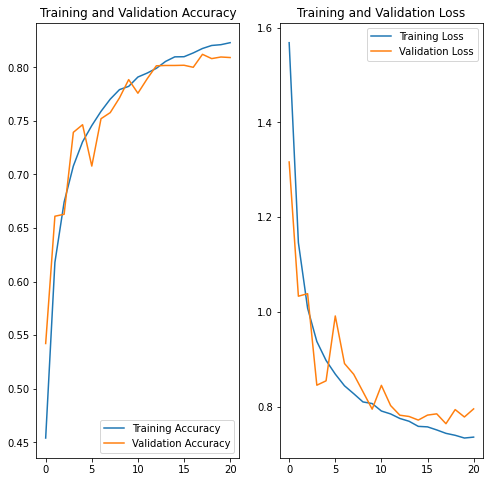

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(21)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.7954 - accuracy: 0.8091 - 1s/epoch - 3ms/step
